In [4]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

def plot_day_spectrum(day_index, data_path="../Images/composite_data_PACE_full.npy", metadata_path="../Images/composite_metadata_PACE.pkl"):
    """
    Plots the mean spectrum for a given day index.
    
    Parameters:
        day_index (int): The index of the day (0 = first day in composite array).
        data_path (str): Path to the saved numpy array.
        metadata_path (str): Path to the saved metadata (pickle file).
    """
    # Load data and metadata
    data = np.load(data_path)
    print("data.shape:", data.shape)
    with open(metadata_path, "rb") as f:
        metadata = pickle.load(f)
    
    wavelengths = metadata["wavelengths"]
    
    # Sanity check for day index
    if day_index < 0 or day_index >= data.shape[0]:
        print(f"Day index {day_index} is out of range. Data has {data.shape[0]} days.")
        return
    
    # Get the day's data
    day_data = data[day_index]  # shape (h, w, c)
    
    # Average over h, w (ignoring NaNs)
    mean_spectrum = np.nanmean(day_data, axis=(0, 1))  # shape (c,)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(wavelengths, mean_spectrum, marker='o', linestyle='-')
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Mean Intensity (sr$^{-1}$ m$^{-2}$ nm$^{-1}$)")
    plt.title(f"Mean Spectrum for Day Index {day_index}")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [7]:
from datetime import datetime

start_date = datetime(2024, 4, 14)
target_date = datetime(2024, 6, 1)

index = (target_date - start_date).days
print(index)

48


data.shape: (405, 93, 163, 172)


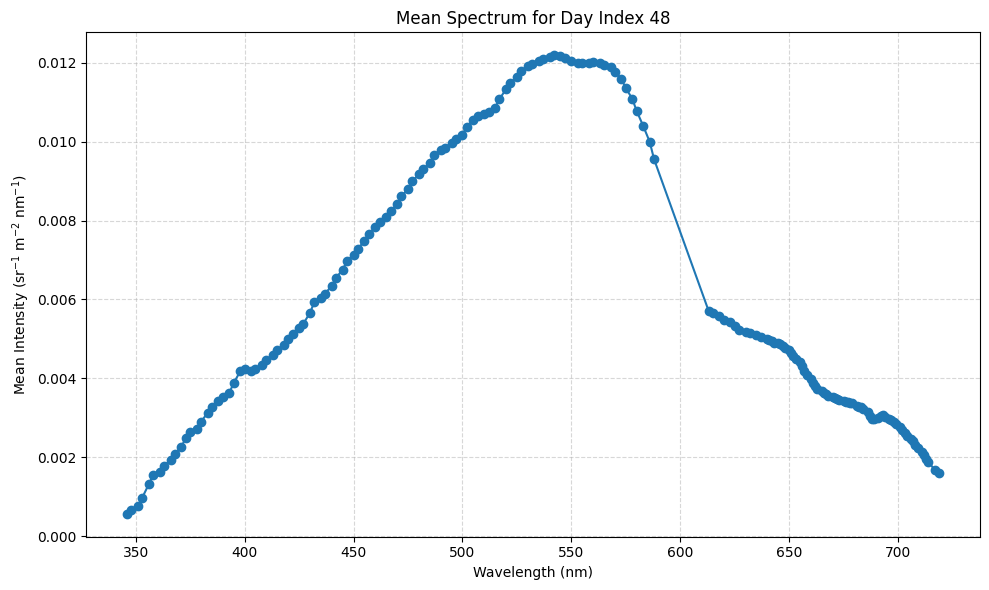

In [8]:
plot_day_spectrum(index)  # Replace 10 with the index of the day you want


In [ ]:
import os
os.getcwd()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pickle

def compare_average_spectra_from_files(ndarray_path, metadata_path, start_date_str="2024-04-14"):
    # Load composite array
    ndarray_all = np.load(ndarray_path)
    
    # Load metadata (wavelengths, lat, lon)
    with open(metadata_path, "rb") as f:
        metadata = pickle.load(f)
    wave_all = metadata["wavelengths"]
    
    # Convert string start date to datetime
    start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
    
    # Define your date ranges
    groupA_start = datetime(2024, 8, 15)
    groupA_end = datetime(2024, 8, 16)
    
    # Build list of dates
    total_days = ndarray_all.shape[0]
    all_dates = [start_date + timedelta(days=i) for i in range(total_days)]
    
    # Create masks
    groupA_mask = np.array([(groupA_start <= d <= groupA_end) for d in all_dates])
    groupB_mask = ~groupA_mask
    
    # Compute averages per group
    def average_over_days(mask):
        # (n, h, w, c) → (c,)
        subset = ndarray_all[mask]  # (num_days, h, w, c)
        mean_values = np.nanmean(subset, axis=(0,1,2))  # average over time, lat, lon
        return mean_values
    
    avg_groupA = average_over_days(groupA_mask)
    avg_groupB = average_over_days(groupB_mask)
    
    # Plot
    plt.figure(figsize=(10,6))
    plt.plot(wave_all, avg_groupA, label="2024-06-11 to 2024-11-05", color='blue')
    plt.plot(wave_all, avg_groupB, label="Other Days", color='orange')
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Average Rrs")
    plt.title("Average Rrs by Wavelength: Group A vs Group B")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
compare_average_spectra_from_files(
    "../Images/composite_data.npy",
    "../Images/composite_metadata.pkl",
    start_date_str="2024-04-14"
)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pickle

def compare_average_derivative_spectra_from_files(ndarray_path, metadata_path, start_date_str="2024-04-14"):
    # Load composite array
    ndarray_all = np.load(ndarray_path)
    
    # Load metadata (wavelengths, lat, lon)
    with open(metadata_path, "rb") as f:
        metadata = pickle.load(f)
    wave_all = metadata["wavelengths"]
    
    # Convert string start date to datetime
    start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
    
    # Define your date ranges
    groupA_start = datetime(2024, 8, 15)
    groupA_end = datetime(2024, 8, 16)
    
    # Build list of dates
    total_days = ndarray_all.shape[0]
    all_dates = [start_date + timedelta(days=i) for i in range(total_days)]
    
    # Create masks
    groupA_mask = np.array([(groupA_start <= d <= groupA_end) for d in all_dates])
    groupB_mask = ~groupA_mask
    
    # Compute averages per group
    def average_over_days(mask):
        # (n, h, w, c) → (c,)
        subset = ndarray_all[mask]  # (num_days, h, w, c)
        mean_values = np.nanmean(subset, axis=(0,1,2))  # average over time, lat, lon
        return mean_values
    
    avg_groupA = average_over_days(groupA_mask)
    avg_groupB = average_over_days(groupB_mask)
    
    # Compute first-order derivative (dRrs/dλ)
    deriv_groupA = np.gradient(avg_groupA, wave_all)
    deriv_groupB = np.gradient(avg_groupB, wave_all)
    
    # Plot
    plt.figure(figsize=(10,6))
    plt.plot(wave_all, deriv_groupA, label="2024-06-11 to 2024-11-05", color='blue')
    plt.plot(wave_all, deriv_groupB, label="Other Days", color='orange')
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("dRrs/dλ")
    plt.title("First-Order Derivative of Average Rrs by Wavelength")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
compare_average_derivative_spectra_from_files(
    "../Images/composite_data.npy",
    "../Images/composite_metadata.pkl",
    start_date_str="2024-04-14"
)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pickle
from scipy.signal import savgol_filter

def compare_average_derivative_spectra_from_files(ndarray_path, metadata_path, start_date_str="2024-04-14"):
    # Load composite array
    ndarray_all = np.load(ndarray_path)
    
    # Load metadata (wavelengths, lat, lon)
    with open(metadata_path, "rb") as f:
        metadata = pickle.load(f)
    wave_all = metadata["wavelengths"]
    
    # Convert string start date to datetime
    start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
    
    # Define your date ranges
    groupA_start = datetime(2024, 6, 11)
    groupA_end = datetime(2024, 11, 5)
    
    # Build list of dates
    total_days = ndarray_all.shape[0]
    all_dates = [start_date + timedelta(days=i) for i in range(total_days)]
    
    # Create masks
    groupA_mask = np.array([(groupA_start <= d <= groupA_end) for d in all_dates])
    groupB_mask = ~groupA_mask
    
    # Compute averages per group
    def average_over_days(mask):
        # (n, h, w, c) → (c,)
        subset = ndarray_all[mask]  # (num_days, h, w, c)
        mean_values = np.nanmean(subset, axis=(0,1,2))  # average over time, lat, lon
        return mean_values
    
    avg_groupA = average_over_days(groupA_mask)
    avg_groupB = average_over_days(groupB_mask)
    
    # Compute first-order derivative (dRrs/dλ)
    deriv_groupA = np.gradient(avg_groupA, wave_all)
    deriv_groupB = np.gradient(avg_groupB, wave_all)
    
    # Apply Savitzky-Golay filter for smoothing
    window_length = 11 if len(wave_all) >= 11 else (len(wave_all) // 2) * 2 + 1  # Must be odd
    polyorder = 3 if window_length > 3 else 2

    deriv_groupA_smooth = savgol_filter(deriv_groupA, window_length=window_length, polyorder=polyorder)
    deriv_groupB_smooth = savgol_filter(deriv_groupB, window_length=window_length, polyorder=polyorder)
    
    # Plot
    plt.figure(figsize=(10,6))
    plt.plot(wave_all, deriv_groupA_smooth, label="2024-06-11 to 2024-11-05 (Smoothed)", color='blue')
    plt.plot(wave_all, deriv_groupB_smooth, label="Other Days (Smoothed)", color='orange')
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("dRrs/dλ (Smoothed)")
    plt.title("First-Order Derivative of Average Rrs by Wavelength")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Optional: Also plot raw derivative for comparison
    plt.figure(figsize=(10,6))
    plt.plot(wave_all, deriv_groupA, label="2024-06-11 to 2024-11-05 (Raw)", linestyle='--', color='blue')
    plt.plot(wave_all, deriv_groupB, label="Other Days (Raw)", linestyle='--', color='orange')
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("dRrs/dλ (Raw)")
    plt.title("First-Order Derivative of Average Rrs by Wavelength (Raw, No Smoothing)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
compare_average_derivative_spectra_from_files(
    "../Images/composite_data.npy",
    "../Images/composite_metadata.pkl",
    start_date_str="2024-04-14"
)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pickle

def plot_spectrogram_from_file(ndarray_path, metadata_path, start_date_str="2024-04-14"):
    # Load composite array
    ndarray_all = np.load(ndarray_path)
    
    # Load metadata (wavelengths, lat, lon)
    with open(metadata_path, "rb") as f:
        metadata = pickle.load(f)
    wave_all = metadata["wavelengths"]
    
    # Convert string start date to datetime
    start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
    
    # Build list of dates
    total_days = ndarray_all.shape[0]
    all_dates = [start_date + timedelta(days=i) for i in range(total_days)]
    date_labels = [d.strftime("%Y-%m-%d") for d in all_dates]
    
    # Average over lat/lon for each day
    # ndarray_all: (n, h, w, c) → (n, c)
    mean_by_day = np.nanmean(ndarray_all, axis=(1,2))  # Shape: (n, c)
    
    # Plot
    plt.figure(figsize=(12, 20))
    plt.imshow(mean_by_day, aspect='auto', cmap='jet', extent=[wave_all[0], wave_all[-1], 0, total_days-1])
    plt.colorbar(label='Average Rrs')
    
    # Flip the date labels so they match the inverted y-axis
    tick_positions = np.linspace(0, total_days-1, 10).astype(int)
    tick_labels = [date_labels[i] for i in tick_positions]
    
    plt.yticks(tick_positions, tick_labels[::-1])  # Reversed for inverted y-axis
    
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Date")
    plt.title("Spectrogram: Average Rrs Over Time")
    plt.gca().invert_yaxis()  # To show earliest date at the top
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_spectrogram_from_file("composite_array.npy", "metadata.pkl", start_date_str="2024-04-14")


/var/folders/sg/s2pmpvfj42b35zzctr2whzcr0000gn/T/ipykernel_53030/3023285003.py:25: RuntimeWarning: Mean of empty slice
  mean_by_day = np.nanmean(ndarray_all, axis=(1,2))  # Shape: (n, c)


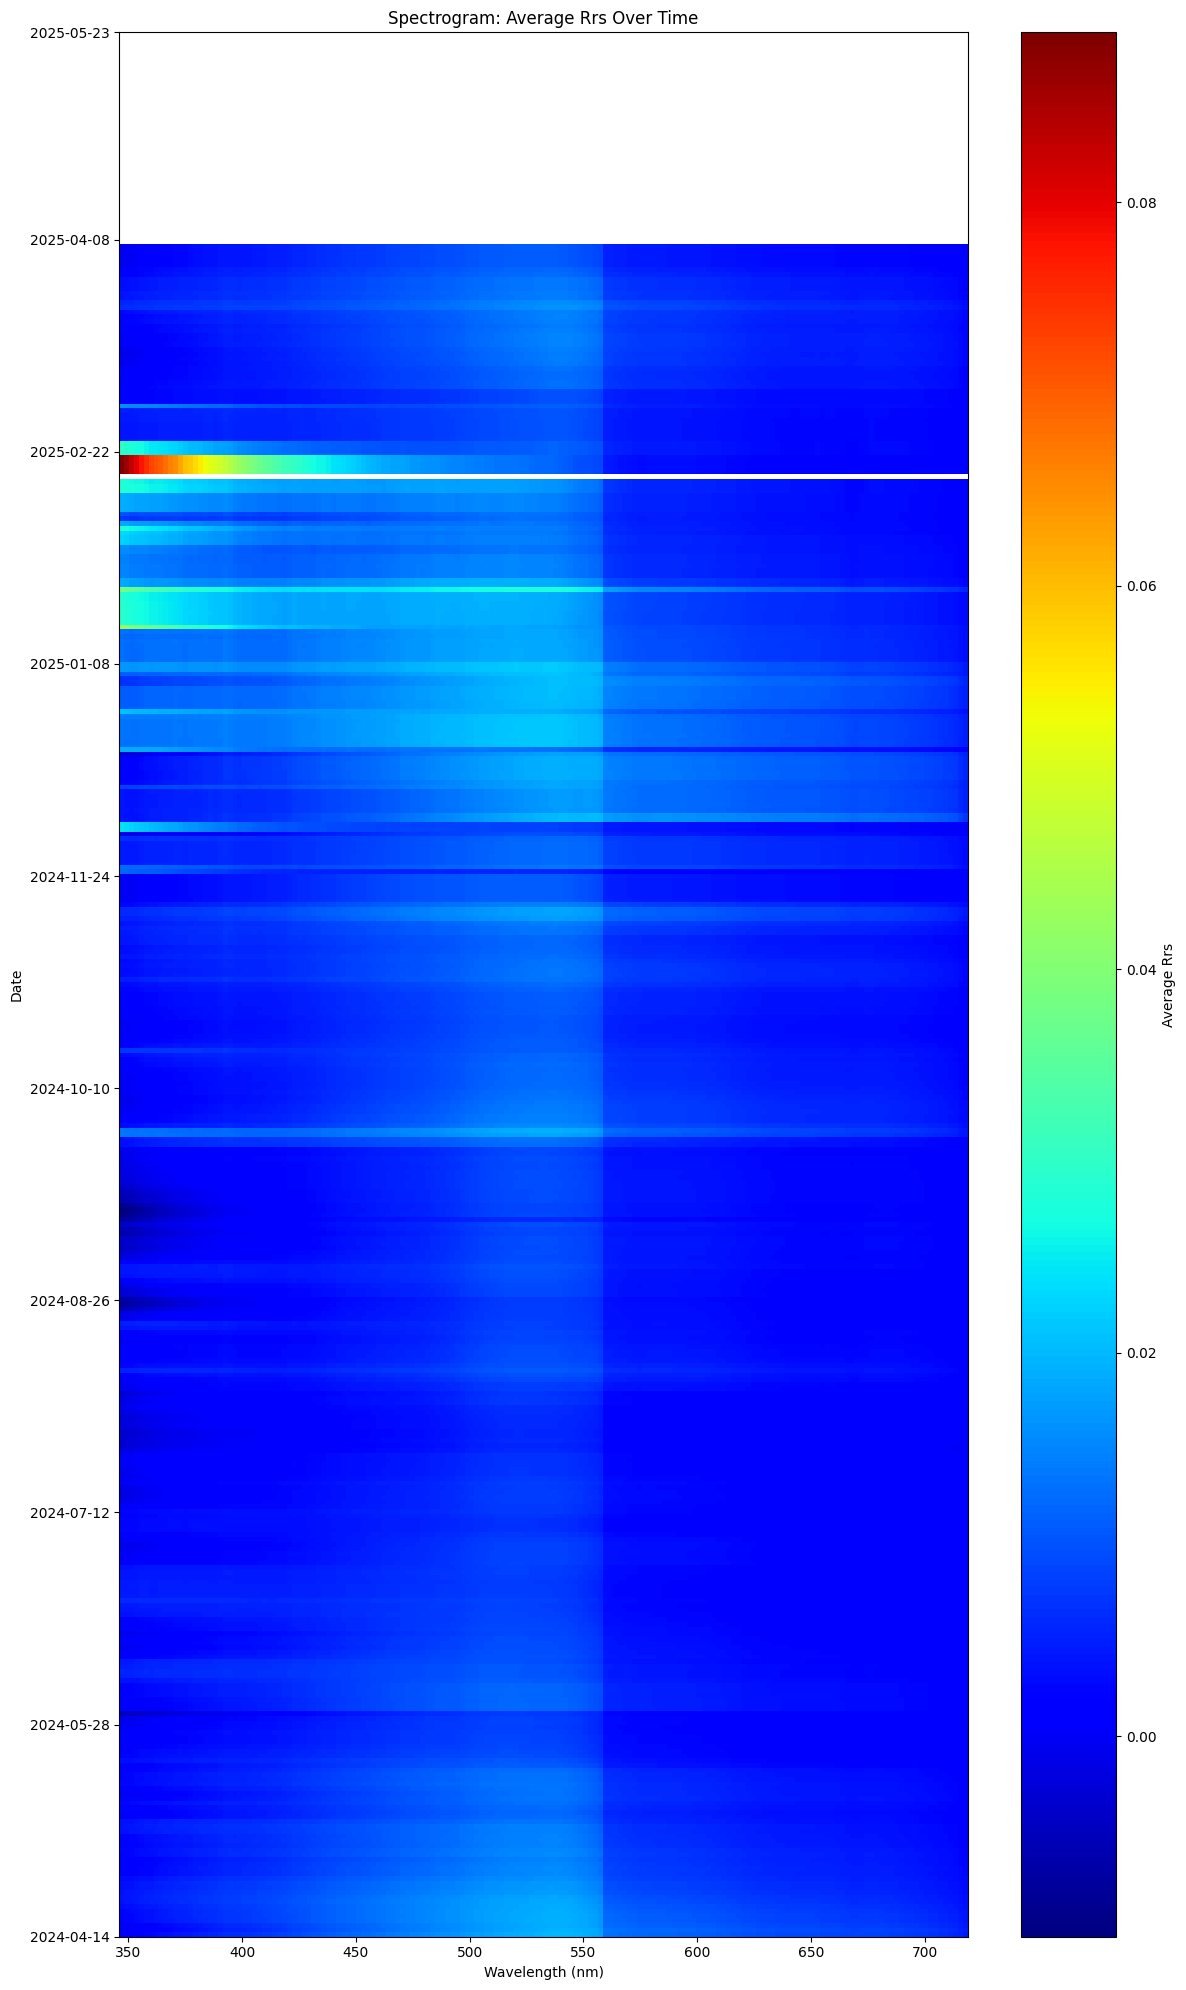

In [11]:
# Example usage:
plot_spectrogram_from_file(
    "../Images/composite_data_PACE_full.npy",
    "../Images/composite_metadata_PACE.pkl",
    start_date_str="2024-04-14")


In [ ]:
# Example usage:
result = compute_index_array(
    "../Images/composite_data.npy",
    "../Images/composite_metadata.pkl")


In [ ]:
result

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# === Load your result array ===
# Assuming you already have the 'result' array in memory, shape (n, h, w)
# If you need to load it, replace this with your file loading step:
# result = np.load("path_to_your_array.npy")  

# === Set the initial date and the day index to plot ===
initial_date = datetime(2024, 4, 14)
day_idx = 125  # Adjust as needed (0-based index)

# === Calculate the actual date for the day index ===
plot_date = initial_date + timedelta(days=day_idx)
plot_date_str = plot_date.strftime("%Y-%m-%d")

# === Select the data for the day ===
z = result[day_idx]  # Shape: (h, w)

# === Generate lat/lon grid (approximate for now) ===
lat_min, lat_max = 41.5, 42.5  # Replace with your actual bounds
lon_min, lon_max = -83.5, -81.0
lat = np.linspace(lat_min, lat_max, z.shape[0])
lon = np.linspace(lon_min, lon_max, z.shape[1])
lon_grid, lat_grid = np.meshgrid(lon, lat)

# === Mask or handle NaNs ===
z_masked = np.ma.masked_invalid(z)  # Mask NaNs for plotting

# === Create colormap (optional: hide NaNs as white) ===
cmap = plt.cm.viridis.copy()
cmap.set_bad(color='white')

# === Plot the heatmap ===
plt.figure(figsize=(10, 8))
mesh = plt.pcolormesh(lon_grid, lat_grid, z_masked, shading='auto', cmap=cmap)
plt.colorbar(mesh, label="Index Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Heatmap of Index - {plot_date_str}")
plt.tight_layout()
plt.show()

# === Count valid and NaN pixels ===
valid_count = np.isfinite(z).sum()
nan_count = np.isnan(z).sum()
print(f"Valid points: {valid_count}")
print(f"NaN points: {nan_count}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os

# === Load your result array ===
# result = np.load("path_to_your_array.npy")

# === Parameters ===
initial_date = datetime(2024, 4, 14)  # Start date of your dataset
start_date_str = "2024-07-11"         # The date you want to start plotting from
num_days_to_plot = 5                   # How many consecutive days to plot
output_dir = "../Images"               # Where to save the plots

# === Generate lat/lon grid (adjust as needed) ===
lat_min, lat_max = 41.5, 42.5
lon_min, lon_max = -83.5, -81.0
lat = np.linspace(lat_min, lat_max, result.shape[1])
lon = np.linspace(lon_min, lon_max, result.shape[2])
lon_grid, lat_grid = np.meshgrid(lon, lat)

# === Find the start index ===
start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
start_idx = (start_date - initial_date).days

# === Make output directory ===
os.makedirs(output_dir, exist_ok=True)

# === Generate plots ===
for i in range(num_days_to_plot):
    day_idx = start_idx + i
    if day_idx >= result.shape[0]:
        print(f"Reached end of available data at day {day_idx}.")
        break

    z = result[day_idx]
    plot_date = initial_date + timedelta(days=day_idx)
    plot_date_str = plot_date.strftime("%Y-%m-%d")

    # Mask NaNs
    z_masked = np.ma.masked_invalid(z)
    cmap = plt.cm.viridis.copy()
    cmap.set_bad(color='white')

    # Plot
    plt.figure(figsize=(10, 8))
    mesh = plt.pcolormesh(lon_grid, lat_grid, z_masked, shading='auto', cmap=cmap, vmin=-0.002, vmax=0.002)
    plt.colorbar(mesh, label="Index Value")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(f"Heatmap of Index - {plot_date_str}")
    plt.tight_layout()

    # Save
    out_path = os.path.join(output_dir, f"heatmap_{plot_date_str}.png")
    plt.savefig(out_path)
    plt.close()
    print(f"Saved: {out_path}")

print("All plots generated.")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pickle
import os

def interpolate_missing_pixels(arr):
    """Fill NaNs in a 2D array where 3 or 4 sides have valid values."""
    filled = arr.copy()
    h, w = arr.shape
    for y in range(1, h-1):
        for x in range(1, w-1):
            if np.isnan(arr[y, x]):
                neighbors = [
                    arr[y-1, x],  # up
                    arr[y+1, x],  # down
                    arr[y, x-1],  # left
                    arr[y, x+1]   # right
                ]
                valid = [v for v in neighbors if not np.isnan(v)]
                if len(valid) >= 3:
                    filled[y, x] = np.mean(valid)
    return filled

def plot_true_color_for_date(ndarray_path, metadata_path, target_date_str, start_date_str="2024-04-14", r_idx=113, g_idx=84, b_idx=42):
    # Load data
    data = np.load(ndarray_path)
    with open(metadata_path, "rb") as f:
        meta = pickle.load(f)
    lat = meta["lat"]
    lon = meta["lon"]
    
    # Find target date index
    start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
    target_date = datetime.strptime(target_date_str, "%Y-%m-%d")
    day_idx = (target_date - start_date).days

    if day_idx < 0 or day_idx >= data.shape[0]:
        print("Date out of range.")
        return

    daily_data = data[day_idx]
    if np.isnan(daily_data).all():
        print(f"No data for {target_date_str}.")
        return

    # Normalize Rrs (assumed range: 0-0.03)
    def normalize(arr, vmin=0, vmax=0.03):
        return np.clip((arr - vmin) / (vmax - vmin), 0, 1)

    r = interpolate_missing_pixels(normalize(daily_data[:, :, r_idx]))
    g = interpolate_missing_pixels(normalize(daily_data[:, :, g_idx]))
    b = interpolate_missing_pixels(normalize(daily_data[:, :, b_idx]))

    rgb = np.stack([r, g, b], axis=-1)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.imshow(rgb, origin="lower", extent=[lon.min(), lon.max(), lat.min(), lat.max()])
    plt.title(f"True-Color Image - {target_date_str}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.tight_layout()
    plt.show()

# Example usage:
plot_true_color_for_date("../Images/composite_data.npy", "../Images/composite_metadata.pkl",
                         "2024-11-12")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pickle

def compare_average_spectra_from_files(ndarray_path, metadata_path, start_date_str="2024-04-14"):
    # Load composite array
    ndarray_all = np.load(ndarray_path)  # Shape: (n_days, h, w, c)
    
    # Load metadata (wavelengths, lat, lon)
    with open(metadata_path, "rb") as f:
        metadata = pickle.load(f)
    wave_all = metadata["wavelengths"]
    
    # Convert string start date to datetime
    start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
    
    # Define your date ranges
    groupA_start = datetime(2024, 6, 11)
    groupA_end = datetime(2024, 11, 5)
    
    # Build list of dates
    total_days = ndarray_all.shape[0]
    all_dates = [start_date + timedelta(days=i) for i in range(total_days)]
    
    # Normalize each day's reflectance spectrum by its max (or sum)
    # (n_days, h, w, c)
    normalized_data = np.empty_like(ndarray_all)
    
    for i in range(total_days):
        day = ndarray_all[i]  # (h, w, c)
        # Compute per-pixel per-day spectrum max (or sum)
        day_sum = np.nansum(day, axis=-1, keepdims=True)  # (h, w, 1)
        day_sum[day_sum == 0] = np.nan  # Prevent division by zero
        normalized = day / day_sum
        normalized_data[i] = normalized
    
    # Create masks
    groupA_mask = np.array([(groupA_start <= d <= groupA_end) for d in all_dates])
    groupB_mask = ~groupA_mask
    
    # Compute averages per group
    def average_over_days(mask):
        # (n, h, w, c) → (c,)
        subset = normalized_data[mask]  # (num_days, h, w, c)
        mean_values = np.nanmean(subset, axis=(0,1,2))  # average over time, lat, lon
        return mean_values
    
    avg_groupA = average_over_days(groupA_mask)
    avg_groupB = average_over_days(groupB_mask)
    
    # Plot
    plt.figure(figsize=(10,6))
    plt.plot(wave_all, avg_groupA, label=f"{groupA_start.strftime('%Y-%m-%d')} to {groupA_end.strftime('%Y-%m-%d')}", color='blue')
    plt.plot(wave_all, avg_groupB, label="Other Days", color='orange')
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Normalized Average Rrs")
    plt.title("Normalized Average Rrs by Wavelength: Group A vs Group B")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
compare_average_spectra_from_files(
    "../Images/composite_data.npy",
    "../Images/composite_metadata.pkl",
    start_date_str="2024-04-14"
)
